In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df= pd.read_csv('dataSLSHSLpqr.csv')

df.head(11)

,p,q,r,A1,L1,A2,L2,A3,L3
0,3,2,2,0.697272,588,0.897795,622,0.673578,655
1,3,3,2,0.737086,592,0.917456,621,0.701330,650
2,3,4,2,0.731879,595,0.917330,621,0.696167,647
3,3,5,2,0.608153,596,0.905459,621,0.632662,645
4,3,6,2,0.492272,597,0.892537,621,0.527849,644
5,3,7,2,0.412174,598,0.882359,621,0.404073,643
6,3,8,2,0.273795,598,0.875351,621,0.301801,643
7,3,9,2,0.199852,599,0.870844,621,0.206111,643
8,3,2,3,0.739739,592,0.829748,621,0.684369,651
9,3,3,3,0.781619,596,0.895376,621,0.726220,645


In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(df.p, df.A3,  color='blue')
plt.ylim(0,1)
plt.xlim(0,11)
plt.xlabel("p")
plt.ylabel("A3")
plt.subplot(1,3,2)
plt.scatter(df.q, df.A3,  color='blue')
plt.ylim(0,1)
plt.xlim(0,11)
plt.xlabel("q")
plt.ylabel("A3")
plt.subplot(1,3,3)
plt.scatter(df.r, df.A3,  color='blue')
plt.ylim(0,1)
plt.xlim(0,11)
plt.xlabel("r")
plt.ylabel("A3")
plt.show()

In [4]:
cdf = df[['p','q','r','A3']]
cdf.head(9)

,p,q,r,A3
0,3,2,2,0.673578
1,3,3,2,0.701330
2,3,4,2,0.696167
3,3,5,2,0.632662
4,3,6,2,0.527849
5,3,7,2,0.404073
6,3,8,2,0.301801
7,3,9,2,0.206111
8,3,2,3,0.684369


In [5]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
len(df)

448

In [6]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['p','q','r']])
y = np.asanyarray(train[['A3']])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)
regr.fit (x_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('intercepts: ', regr.intercept_)

Coefficients:  [[-0.09354377 -0.05784519  0.05913679]]
intercepts:  [1.06031178]


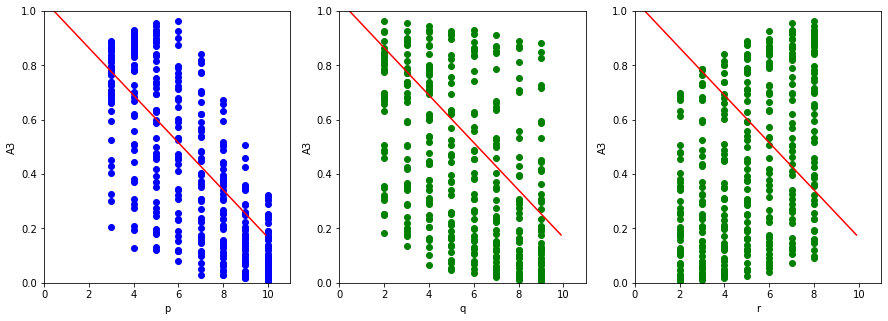

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(train.p, train.A3,  color='blue')
plt.xlabel("p")
plt.ylabel("A3")
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][0]*XX + regr.coef_[0][1]*XX + regr.coef_[0][2]*XX
plt.plot(XX, yy, '-r' )
plt.ylim(0,1)
plt.xlim(0,11)

plt.subplot(1,3,2)
plt.scatter(train.q, train.A3,  color='green')
plt.xlabel("q")
plt.ylabel("A3")
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][0]*XX + regr.coef_[0][1]*XX  + regr.coef_[0][2]*XX
plt.ylim(0,1)
plt.xlim(0,11)
plt.plot(XX, yy, '-r' )

plt.subplot(1,3,3)
plt.scatter(train.r, train.A3,  color='green')
plt.xlabel("r")
plt.ylabel("A3")
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][0]*XX + regr.coef_[0][1]*XX  + regr.coef_[0][2]*XX
plt.ylim(0,1)
plt.xlim(0,11)
plt.plot(XX, yy, '-r' )


In [7]:
y_hat= regr.predict(x_test)
x = np.asanyarray(x_test)
y = np.asanyarray(y_test)

from sklearn.metrics import r2_score 

print('Variance score: %.2f' % r2_score(y, y_hat))

Variance score: 0.86


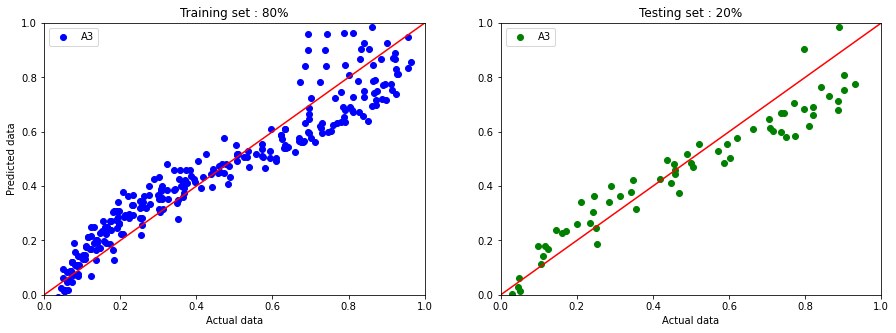

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
y_pred_train = regr.intercept_[0]+ regr.coef_[0][0]*x_train[:,0] + regr.coef_[0][1]*x_train[:,1] + regr.coef_[0][2]*x_train[:,2]
plt.scatter(  y_train , y_pred_train, color='blue' , label='A3')
plt.xlabel("Actual data")
plt.ylabel("Predicted data")
XX = np.arange(0.0, 10.0, 0.1)
#yy = regr.intercept_[0]+ regr.coef_[0][0]*XX + regr.coef_[0][1]*XX
yy = XX
plt.plot(XX, yy, '-r' )
plt.ylim(0,1)
plt.xlim(0,1)
plt.title('Training set : 80%')
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Actual data")

yy = XX
plt.plot(XX, yy, '-r' )
y_pred_test = regr.intercept_[0]+ regr.coef_[0][0]*x_test[:,0] + regr.coef_[0][1]*x_test[:,1] + regr.coef_[0][2]*x_test[:,2]
plt.ylim(0,1)
plt.xlim(0,1)
plt.scatter( y_test ,y_pred_test,  color='green', label='A3')
plt.title('Testing set : 20%')
plt.legend()

In [9]:
y_train.shape

(290, 1)

In [10]:
print(y_pred_train)

[ 0.17090549  0.71732453  0.1878857   0.22487588  0.38852519  0.69130311
  0.69001151  0.67303129  0.25089729  0.35153502  0.30874248  0.81086829
  0.54120575  0.43519253  0.69388631  0.72700168  0.39949395  0.45733914
  0.02661049  0.08316408  0.86871348  0.6138945   0.17670784  0.49195522
  0.38981679  0.12745731  0.38723359  1.01881084  0.52636219  0.63474952
  0.12144585  0.23842784  0.22358428  0.7504399   0.51797663  0.39239999
  0.28401267  0.46121394  0.68033435  0.30724179  0.12015425  0.36529608
  0.65431293  0.57690433  0.09671604  0.57819593  0.4672254   0.16832229
  0.07607012  0.50292398  0.30486768  0.7491483   0.37497324  0.24831409
  0.06961212  0.90570366  0.49303772  0.65818773  0.50163238  0.36658768
 -0.00908809  0.36637858  0.83172331  0.01822493  0.37734734  0.23971944
  0.12874891  0.13262371  0.14488407  0.27283481  0.23584464  0.56464397
  0.6087281   0.44637039  0.60034254  0.98440387  0.86613028  0.95967405
  0.24960569  0.68871991  0.20014606  0.08445568  0

In [11]:
print(y_test)

[[0.24492062]
 [0.24913985]
 [0.44810888]
 [0.59346403]
 [0.82120956]
 [0.88589425]
 [0.8114964 ]
 [0.88633357]
 [0.03339924]
 [0.60229744]
 [0.02930856]
 [0.7436111 ]
 [0.34230493]
 [0.21035098]
 [0.79772675]
 [0.16188171]
 [0.62015163]
 [0.69538692]
 [0.77441987]
 [0.11183386]
 [0.86270903]
 [0.2858287 ]
 [0.09717729]
 [0.77126872]
 [0.11720569]
 [0.10507937]
 [0.02710332]
 [0.50582041]
 [0.78148222]
 [0.66222851]
 [0.90168653]
 [0.45433415]
 [0.45773024]
 [0.45685864]
 [0.17088979]
 [0.58628936]
 [0.81995955]
 [0.19920221]
 [0.50124455]
 [0.73723576]
 [0.79655842]
 [0.3566297 ]
 [0.88963855]
 [0.14481022]
 [0.34884125]
 [0.43646955]
 [0.51984537]
 [0.90141193]
 [0.28907652]
 [0.71464759]
 [0.0111526 ]
 [0.04505957]
 [0.74860719]
 [0.02282634]
 [0.03026008]
 [0.31410716]
 [0.04791394]
 [0.23544069]
 [0.84973648]
 [0.46727417]
 [0.12486867]
 [0.04935484]
 [0.49039703]
 [0.24325664]
 [0.57107935]
 [0.73559867]
 [0.93017224]
 [0.01177539]
 [0.84261781]
 [0.41809003]
 [0.25277455]
 [0.70

In [19]:
print(y_pred_test)

[ 0.36508698  0.24573089  0.41067181  0.55475771  0.66077093  0.67904275
  0.61990596  0.71474133 -0.04349506  0.50421558 -0.06822488  0.66915649
  0.37755643  0.34294036  0.68291755  0.22875068  0.57561273  1.07794763
  0.58549898  0.14100927  0.73087648  0.34056626  0.17799944  0.70506417
  0.18058264  0.11176869 -0.06693328  0.468517    1.02139404  0.6113113
  0.80957669  0.48206896  0.45754824  0.44378719  0.23455304  0.48594376
  0.69259471  0.26057445  0.48336056  0.59775934  0.90312046  0.31454484
  0.98569547  0.23713624  0.42293217  0.49453842  0.55367521  0.7517315
  0.40078555  0.60163414 -0.21832224  0.02790209  0.57948753 -0.10263185
  0.00317227  0.36400448  0.06101746  0.26444925  1.04354066  0.37368164
  0.16703069  0.01435013  0.51647594  0.30615928  0.53023699  0.66786489
  0.77516972 -0.21961384  0.76290936  0.42680697  0.1865941   0.6126029
  0.64721897]
